## Start the lib to-be-used

In [1]:
import graphlab

In [64]:
from graphlab import  aggregate as agg

## Load house-sale data

In [2]:
house_data = graphlab.SFrame('home_data.gl/')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\zby0902\AppData\Local\Temp\graphlab_server_1529050521.log.0


This non-commercial license of GraphLab Create for academic use is assigned to bzha0010@student.monsh.edu and will expire on June 12, 2019.


## EDA of the data

In [33]:
graphlab.canvas.set_target('headless')
house_data.show(view='Scatter Plot',x='sqft_living', y= 'price' )

Canvas is accessible via web browser at the URL: http://localhost:50017/index.html


# Split train and test sets

In [4]:
train_data , test_data = house_data.random_split(.8,seed=0)

## Train the linear model

In [11]:
sqft_model = graphlab.linear_regression.create(train_data,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16553

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.005985     | 4344643.293320     | 2291721.037904       | 264072.171036 | 239367.159473   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

## Evaluate the simple model

In [12]:
print test_data['price'].mean()

543054.042563


In [13]:
print sqft_model.evaluate(test_data)

{'max_error': 4139687.31905397, 'rmse': 255199.12006887211}


In [14]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


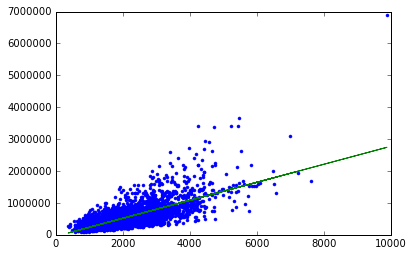

In [21]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],linear_model.predict(test_data))

In [22]:
linear_model.coefficients

name,index,value,stderr
(intercept),None,-47895.0344565,5062.44470107
sqft_living,None,282.286989778,2.22322184897


## Explore other features

In [26]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [27]:
house_data[features].show()

Canvas is accessible via web browser at the URL: http://localhost:49918/index.html


In [34]:
house_data.show(view='BoxWhisker Plot',x='zipcode',y='price')

Canvas is accessible via web browser at the URL: http://localhost:50017/index.html


## Build a regression model with more features

In [35]:
more_feature_model = graphlab.linear_regression.create(train_data,target='price',features=features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16589

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.025932     | 3753808.070680     | 1470858.853877       | 183008.415178 | 160486.266632   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [37]:
print sqft_model.evaluate(test_data)
print more_feature_model.evaluate(test_data)

{'max_error': 4139687.31905397, 'rmse': 255199.12006887211}
{'max_error': 3493376.7844800362, 'rmse': 179874.21821682854}


## Apply the model to predict 3 houses

In [39]:
house1 = house_data[house_data['id']=='5309101200']

In [41]:
house1['price']

dtype: int
Rows: 1
[620000L]

In [42]:
sqft_model.predict(house1)

dtype: float
Rows: 1
[629928.5361543396]

In [40]:
more_feature_model.predict(house1)

dtype: float
Rows: 1
[724384.912979264]

In [53]:
house2 = house_data[house_data['id'] == '1925069082']; house2['price']

dtype: int
Rows: ?
[2200000L, ... ]

In [54]:
sqft_model.predict(house2)

dtype: float
Rows: 1
[1262566.7850640041]

In [55]:
more_feature_model.predict(house2)

dtype: float
Rows: 1
[1436426.7438110048]

In [56]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

print more_feature_model.predict(graphlab.SFrame(bill_gates))

[13768226.271327294]


# Quiz

# 1. 

In [80]:
house_data['zipcode'].unique()

dtype: str
Rows: 70
['98032', '98115', '98075', '98034', '98106', '98024', '98122', '98010', '98117', '98116', '98001', '98178', '98011', '98056', '98074', '98022', '98065', '98144', '98136', '98052', '98023', '98004', '98028', '98008', '98188', '98040', '98031', '98107', '98125', '98155', '98118', '98029', '98148', '98002', '98070', '98198', '98005', '98166', '98103', '98006', '98030', '98055', '98042', '98039', '98053', '98033', '98077', '98058', '98199', '98109', '98059', '98007', '98133', '98146', '98119', '98045', '98003', '98102', '98038', '98027', '98126', '98168', '98108', '98105', '98014', '98177', '98072', '98019', '98092', '98112']

In [90]:
house_data.groupby(key_columns='zipcode',operations={'mean_price':agg.MEAN('price')}).sort('mean_price',0)

zipcode,mean_price
98039,2160606.6
98004,1355927.09779
98040,1194230.00355
98112,1095499.36803
98102,901258.238095
98109,879623.623853
98105,862825.231441
98006,859684.763052
98119,849448.01087
98005,810164.880952


In [99]:
house_data[(house_data['sqft_living']>= 2000) & (house_data['sqft_living']<=4000)].shape[0]

9221

In [100]:
house_data.shape[0]

21613

In [104]:
9921./21613

0.4590292879285615

In [105]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [107]:
advanced_model = graphlab.linear_regression.create(train_data,target='price',features=advanced_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16540

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.018938     | 3459701.433875     | 1901308.077615       | 154260.707837 | 163732.942377   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [109]:
advanced_model.evaluate(test_data)['rmse'] - more_feature_model.evaluate(test_data)['rmse']

-23020.061512238026